In [318]:
import pandas as pd
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 5)

In [305]:
all_metadata_df = pd.read_hdf(
    '/home/jack/data/pvoutput.org/processed/UK_PV_listing_metadata.hdf', 
    'metadata')

## Number of systems

This is just the number of systems I've scraped from https://pvoutput.org/map.jsp?country=243

There are at least 3,026 UK PV systems in total on PVOutput.org; but it looks like about 500 don't have any valid timeseries data.

For my subsequent analyses, I'll probably use the systems scraped from the PVOutput.org/map.jsp page.  The bad news is that the map doesn't list every PV system (it seems to stop at 128 pages, with 20 PV systems per page).  But the good news is that the map listing is ranked; so the PV systems with no actual timeseries data should fall off the bottom of the ranking.

In [329]:
print('Number of UK PV systems in dataset:', len(all_metadata_df))

Number of UK PV systems in dataset: 2559


## Distribution of tilt angles

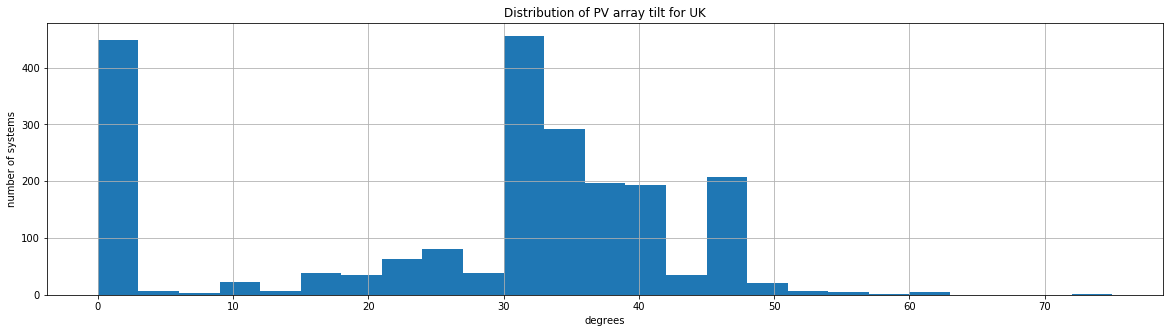

In [322]:
ax = all_metadata_df[['system_1_tilt_degrees', 'system_2_tilt_degrees']].stack().hist(bins=25)
ax.set_xlabel('degrees')
ax.set_ylabel('number of systems')
ax.set_title('Distribution of PV array tilt for UK');

## Distribution of duration of timeseries

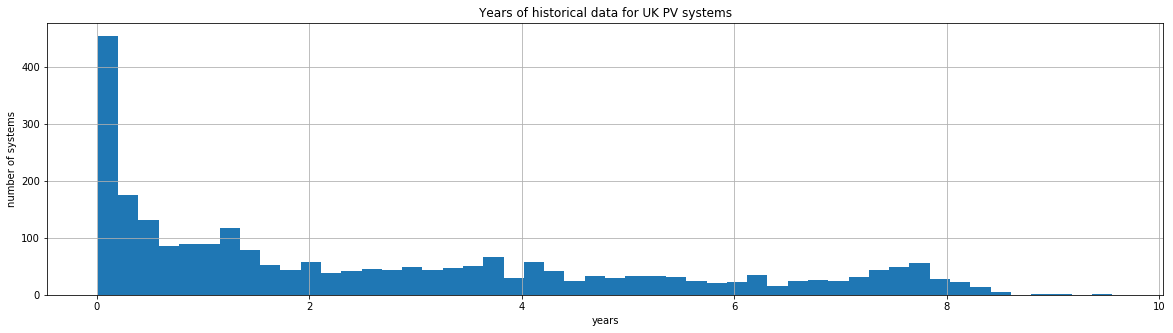

In [324]:
ax = (all_metadata_df['Outputs'].astype('timedelta64[D]') / 365).hist(bins=50)
ax.set_xlabel('years')
ax.set_ylabel('number of systems')
ax.set_title('Years of historical data for UK PV systems');

## Distribution of system capacities

In [310]:
all_metadata_df['system_capacity_kw'].describe()[['mean', 'min', 'max']]

mean      4.181135
min       0.030000
max     252.000000
Name: system_capacity_kw, dtype: float64

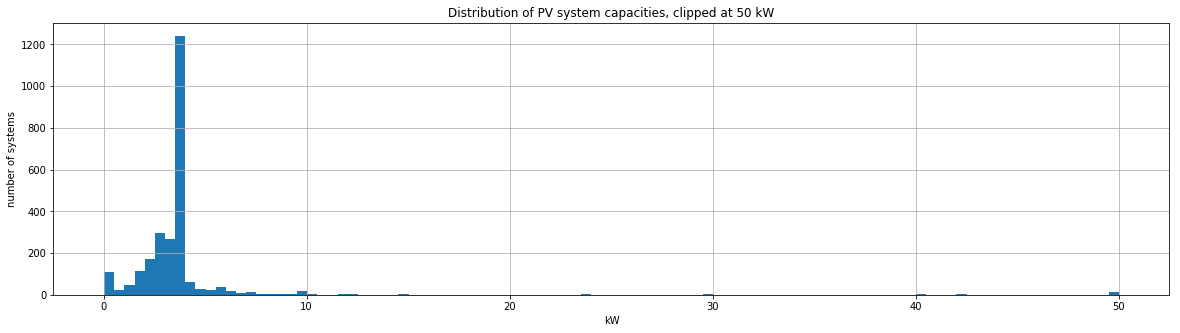

In [325]:
ax = all_metadata_df['system_capacity_kw'].clip(upper=50).hist(bins=100)
ax.set_xlabel('kW')
ax.set_ylabel('number of systems')
ax.set_title('Distribution of PV system capacities, clipped at 50 kW');

## Distribution of efficiencies

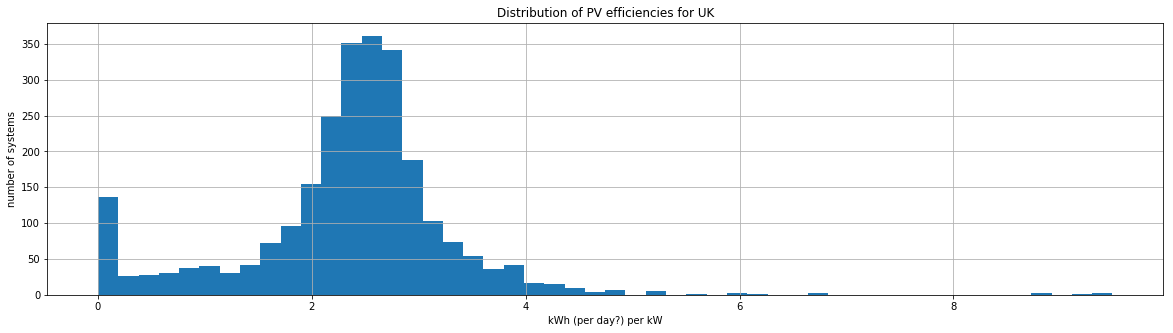

In [326]:
ax = all_metadata_df['efficiency_kWh_per_kW'].hist(bins=50)
ax.set_xlabel('kWh (per day?) per kW')
ax.set_ylabel('number of systems')
ax.set_title('Distribution of PV efficiencies for UK');

## Number of systems with two PV arrays

In [328]:
print(
    'There are', 
    (~all_metadata_df['system_2_tilt_degrees'].isnull()).sum(),
    'UK PV systems with 2 PV arrays.')

There are 25 UK PV systems with 2 PV arrays.
